## Lab 2 - Stemming and Part of Speech Tagging with NLTK

by Jenny Gong

Today we will build upon what we learned last week concerning frequency distributions to utilize stemming and part of speech (POS) taggers.

Stemming is the process for reducing words to their word stem, base or root form. For example, the result of stemming the words “kicker,” “kicked” and “kicking” is “kick.” 

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS-tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. 

A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word. 

We’ll be tagging words in the input file as these types of nouns, among other tags:

- NN: Noun, singular or mass
- NNP: Proper noun, singular
- NNS: Noun, plural
- NNPS: Proper noun, plural

You can find a comprehensive list of POS abbrevations and their meanings here: (https://cs.nyu.edu/grishman/jet/guide/PennPOS.html). 


### Preliminary Steps

In [40]:
import nltk 
from nltk.corpus import stopwords
from nltk import FreqDist

In [41]:
f = open('input_new.txt','r')
raw = f.read()
raw = raw.replace('\n',' ')

In [42]:
#Tokenization
tokens = nltk.word_tokenize(raw)

#Stopwords Removal and only keep text data then change to lowercase
mystopwords = stopwords.words('english')
words = [w.lower() for w in tokens if w.isalpha() if w.lower()not in mystopwords]

### Stemming

1. Porter Stemmer 

In [43]:
#Use Porter Stemmer 
porter = nltk.PorterStemmer() 
stem1 = [porter.stem(w) for w in words]

#Encode with utf-8
stem1 = [w.encode('utf8') for w in stem1]

#Get the frequency distribution 
freq1 = FreqDist(stem1)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)

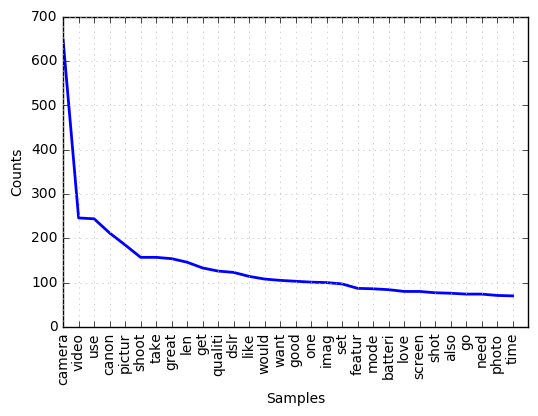

In [45]:
freq1.plot(30)

2.Lancaster Stemmer

In [46]:
#Steps are the same with the Porter Stemmer
lancaster = nltk.LancasterStemmer()
stem2 = [lancaster.stem(w) for w in words]
stem2 = [w.encode('utf8') for w in stem2]
freq2 = FreqDist(stem2)
sorted_freq2 = sorted(freq2.items(),key = lambda k: k[1], reverse = True)

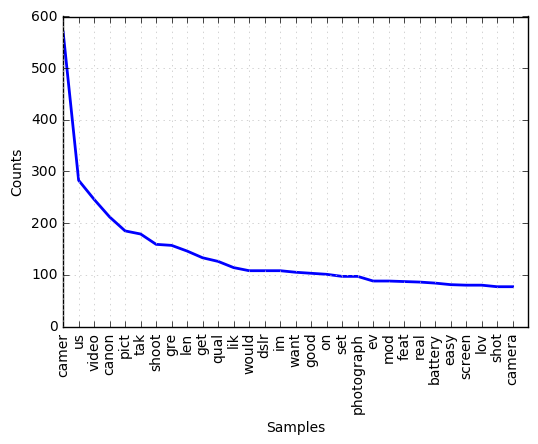

In [48]:
freq2.plot(30)

3.WordNet Lemmatizer

In [49]:
#Steps are the same with the previous two stemmers 
wnl = nltk.WordNetLemmatizer()
stem3 = [lancaster.stem(w) for w in words]
stem3 = [w.encode('utf8') for w in stem3]
freq3 = FreqDist(stem3)
sorted_freq3 = sorted(freq3.items(),key = lambda k: k[1], reverse = True)

In [63]:
sorted_freq3 = sorted(freq3.items(),key = sort, reverse = True)

In [61]:
help(sorted)

Help on built-in function sorted in module __builtin__:

sorted(...)
    sorted(iterable, cmp=None, key=None, reverse=False) --> new sorted list



In [62]:
def sort(k):
    return k[1]

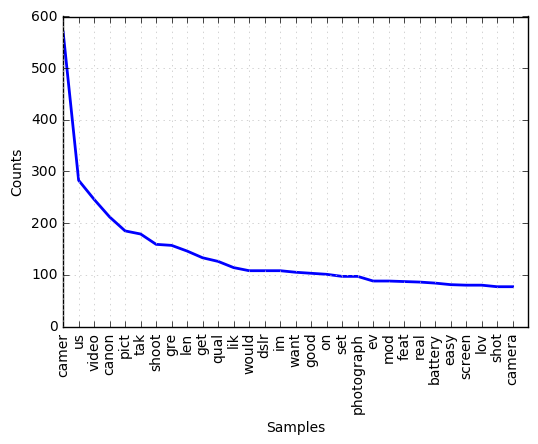

In [51]:
freq3.plot(30)

In [52]:
#write result into .txt file
with open('stemming_output.txt','w') as f:
    for word, frequency in sorted_freq1: #here you can change to sorted_freq2 or 3 
        f.write(str(word)+'\t'+str(frequency)+'\n')

### Part of Speech Tags

- NN: Noun, singular or mass
- NNP: Proper noun, singular
- NNS: Noun, plural
- NNPS: Proper noun, plural

In [54]:
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'

#Generate a list of POS tags
POS_tag_list = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

In [57]:
#Generate a frequency distribution of all the POS tags
tag_freq = nltk.FreqDist(POS_tag_list)
#Sort the result 
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)

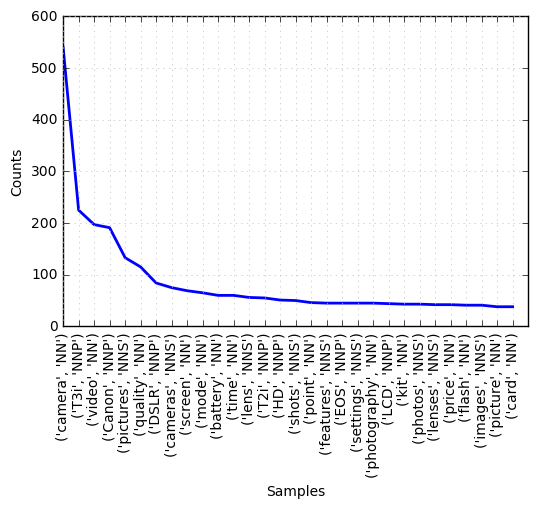

In [59]:
tag_freq.plot(30)

In [60]:
#write result into .txt file
with open('POS_output.txt','w') as f:
    for (word,tag),frequency in sorted_tag_freq:
        f.write(str(word)+'\t'+str(tag)+'\t'+str(frequency)+'\n')